This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

Gonna use the 10000 most common words.  Strange words are removed.  

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

SO the number in the array is the position in the library.  

In [ ]:
from keras.datasets import imdb
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
train_data[0]

#len(train_data[0])

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_data.shape

(25000,)

Train labels are either a zero or one value,  postiive or negative revieww.

In [ ]:
train_labels[0]

1

In [ ]:
test_data.shape

(25000,)

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

Each vector has a length of 10k.  Matrix will be 25k elements which is length of data set X 10000 columns (one hot encoder)  We turned it into a sparse matrix.  

vectorize_sequences automatically implements multi-hot encoding

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  # this will set a zero to 1,  so once that index is a 1, it doesnt matter if a duplicate comes up.
  # now the data is equal size for every row in the dataset.
  # zero the data set
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
# making training and testing vectors with multi hot encoded vectors
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

This will make it numpy elements below.  It will be a float and not a string.

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

What will be a good loss function for the model?


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

training data split below into training and into validation below.  so now we have training, validation and test datasets.  Y is labels

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

train with train and label   Then validation used to see how well model is doing in terms of your metrics (accuracy and loss)

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 83ms/step - loss: 0.5082 - accuracy: 0.7923 - val_loss: 0.3844 - val_accuracy: 0.8675
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3107 - accuracy: 0.8975 - val_loss: 0.3009 - val_accuracy: 0.8848
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2280 - accuracy: 0.9236 - val_loss: 0.2927 - val_accuracy: 0.8773
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1765 - accuracy: 0.9395 - val_loss: 0.2736 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1420 - accuracy: 0.9525 - val_loss: 0.3016 - val_accuracy: 0.8821
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1193 - accuracy: 0.9611 - val_loss: 0.3068 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0940 - accuracy: 0.9708 - val_loss: 0.3745 - val_accuracy: 0.8683
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

Maybe after epoch 5 new data not working well.
It stops generalizing well after that.  
training data was split into partial training and validation sets.  15k and 10k each repsectively.   
train(partial_train, label_partial) with a batch size of 512 reviews each batch.  Loss and accuracy computed with each epoch   Their is a loss and accuracy after each epoch for the training and validation sets.  

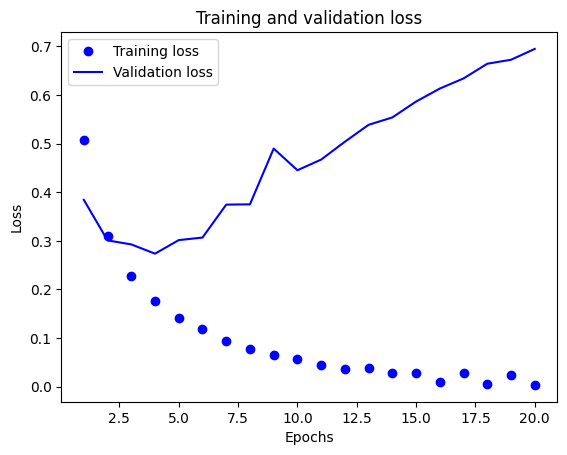

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

This shows a lot of overfitting in graph below.  
It look like 4 epochs was enough  so we will retrain the model below with just 4.

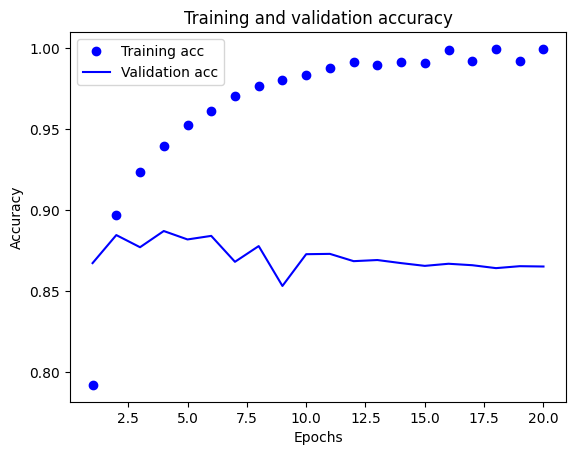

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 24ms/step - loss: 0.4665 - accuracy: 0.8059
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2730 - accuracy: 0.9040
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2141 - accuracy: 0.9222
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2934 - accuracy: 0.8834


In [ ]:
results

[0.29339325428009033, 0.8834400177001953]

### Using a trained model to generate predictions on new data

testing has 25000

sigmoid function output is a probability between 0 and 1.

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.18402232],
       [0.9998699 ],
       [0.5403229 ],
       ...,
       [0.11409222],
       [0.07138382],
       [0.48166156]], dtype=float32)

In [ ]:
len(model.predict(x_test))

782/782 [==============================] - 1s 2ms/step


25000

### Further experiments

ADDING A FEW EXTRAS VERSIONS TO LOOK FOR DIFFERENECES

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [ ]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 78ms/step - loss: 2.7208 - accuracy: 0.5182 - val_loss: 1.8312 - val_accuracy: 0.6130
Epoch 2/20
16/16 [==============================] - 1s 73ms/step - loss: 1.5304 - accuracy: 0.6785 - val_loss: 1.3972 - val_accuracy: 0.6880
Epoch 3/20
16/16 [==============================] - 1s 72ms/step - loss: 1.1740 - accuracy: 0.7471 - val_loss: 1.2075 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.9561 - accuracy: 0.7975 - val_loss: 1.1031 - val_accuracy: 0.7610
Epoch 5/20
16/16 [==============================] - 1s 50ms/step - loss: 0.7975 - accuracy: 0.8326 - val_loss: 1.0136 - val_accuracy: 0.7810
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6631 - accuracy: 0.8627 - val_loss: 0.9544 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5519 - accuracy: 0.8859 - val_loss: 0.9115 - val_accuracy: 0.7990
Epoch 8/20
16

**Plotting the training and validation loss**

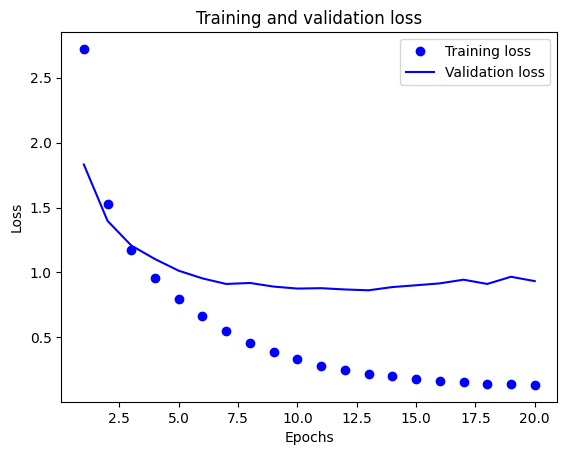

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

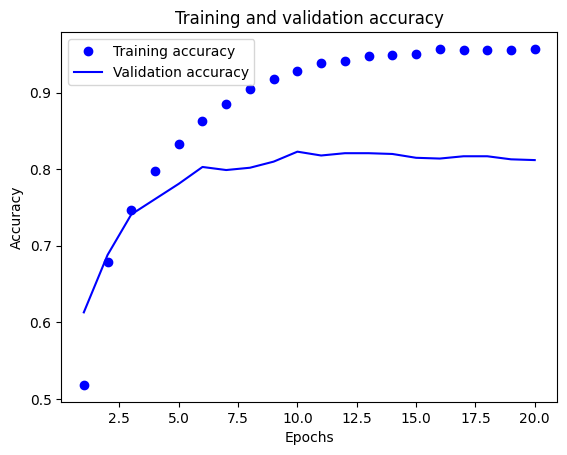

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 42ms/step - loss: 2.7826 - accuracy: 0.5101
Epoch 2/9
18/18 [==============================] - 1s 44ms/step - loss: 1.5230 - accuracy: 0.6839
Epoch 3/9
18/18 [==============================] - 1s 41ms/step - loss: 1.1297 - accuracy: 0.7584
Epoch 4/9
18/18 [==============================] - 1s 42ms/step - loss: 0.9086 - accuracy: 0.8053
Epoch 5/9
18/18 [==============================] - 1s 41ms/step - loss: 0.7420 - accuracy: 0.8409
Epoch 6/9
18/18 [==============================] - 1s 52ms/step - loss: 0.6166 - accuracy: 0.8710
Epoch 7/9
18/18 [==============================] - 1s 70ms/step - loss: 0.5122 - accuracy: 0.8937
Epoch 8/9
18/18 [==============================] - 1s 61ms/step - loss: 0.4288 - accuracy: 0.9090
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9074 - accuracy: 0.7930


In [ ]:
results

[0.9074480533599854, 0.792965292930603]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18477292965271594

### Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

0.99999994

In [ ]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 23ms/step - loss: 2.6631 - accuracy: 0.3899 - val_loss: 1.8943 - val_accuracy: 0.5570
Epoch 2/20
63/63 [==============================] - 2s 24ms/step - loss: 1.6420 - accuracy: 0.6065 - val_loss: 1.5252 - val_accuracy: 0.6130
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 1.3657 - accuracy: 0.6729 - val_loss: 1.3944 - val_accuracy: 0.6690
Epoch 4/20
63/63 [==============================] - 1s 15ms/step - loss: 1.2010 - accuracy: 0.7169 - val_loss: 1.3346 - val_accuracy: 0.6850
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 1.0852 - accuracy: 0.7299 - val_loss: 1.2660 - val_accuracy: 0.6930
Epoch 6/20
63/63 [==============================] - 1s 15ms/step - loss: 0.9929 - accuracy: 0.7405 - val_loss: 1.2505 - val_accuracy: 0.6920
Epoch 7/20
63/63 [==============================] - 1s 15ms/step - loss: 0.9177 - accuracy: 0.7486 - val_loss: 1.2324 - val_accuracy: 0.6900
Epoch 8/20
63

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[2.0535006523132324,
 2.2289657592773438,
 2.4305217266082764,
 2.3512918949127197]

In [ ]:
np.mean(all_scores)

2.3649085462093353

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

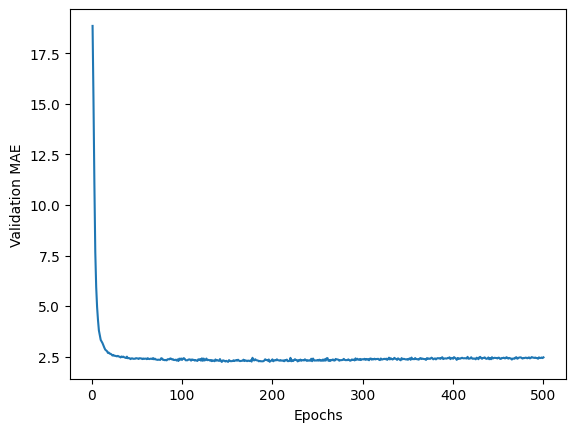

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

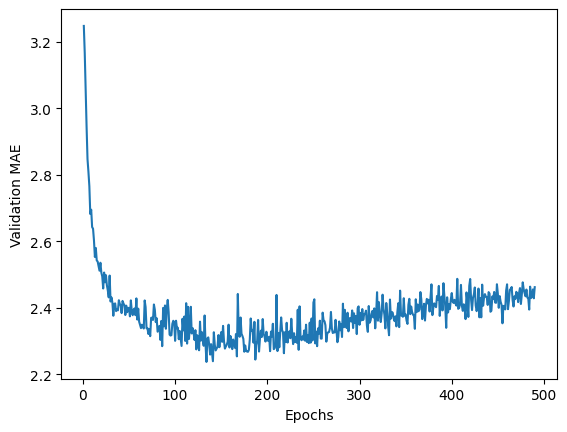

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 22.4498 - mae: 3.0300


In [ ]:
test_mae_score

3.0300378799438477

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 2ms/step


array([10.458997], dtype=float32)

### Wrapping up

## Summary